In [1]:
import os,sys
import json
import subprocess
import pandas as pd
import numpy as np

In [2]:
def mobidb_lite_prediction(indir, uid):
    """prediction use mobidb-lite"""
    cmd = "python /mnt/Storage/home/yuzhaowei/software/mobidb-lite/mobidb-lite.py -bin /mnt/Storage/home/yuzhaowei/software/mobidb-lite/binx -t 7 -o {0}_mobidb_lite.json -l {1}/{0}.fasta" . format(uid, indir)
    # print(cmd)
    # subprocess.run(cmd, check = True, shell = True)
    return(cmd)

def mobidb_lite_summary(uid):
    """summarized all mobidb lite prediction result"""
    
    inf = open("{0}_mobidb_lite.json" . format(uid), "r")
    print(uid)
    try:
        dict_json = json.load(inf)
        regions = dict_json["regions"]
        IDR_region = 0
        for region in regions:
            IDR_region += (region[1] - region[0])
        IDR_content = IDR_region / len(dict_json["p"]) # resiudes in IDR region / all resiudes
        print(IDR_content)
    except:
        IDR_content = 0

    return(IDR_content)

### IDR prediction for transcription regulators in human

In [3]:
indir = "/mnt/Storage/home/yuzhaowei/projects/Factor.Harbor/data/public/ProteinSequence/Human"
df_human_uniprot = pd.read_csv("{0}/CistromeDB_human_factor_uniprot.txt" . format(indir), header = 0, sep = "\t")
human_uids = df_human_uniprot.loc[:, "uniprot_id"].values
outf = open("human_IDR_prediction.sh", "w")
outf.write("source ~/anaconda3/bin/activate py27 \n")
for uid in human_uids:
    if uid != "None":
        cmd = mobidb_lite_prediction(indir, uid)
        outf.write(cmd + "\n")
outf.close()

In [4]:
%%bash

bash human_IDR_prediction.sh

In [4]:
outf2 = open("human_MobiDB_lite.txt", "w")
for uid in np.unique(human_uids):
    if uid != "None":
        outf2.write("{0}\t{1}\n".format(uid, mobidb_lite_summary(uid)))
outf2.close()

A0AVK6
0.18108419838523646
A0PJY2
0.09894736842105263
A2RRD8
A6H8Y1
0.4096798780487805
A6NHJ4
A6NHQ4
0.5567282321899736
A6NJL1
0.3878787878787879
A6NP11
A8K8V0
0.15555555555555556
A8MT65
A8MUZ8
A9YTQ3
0.20256776034236804
B2RXF5
0.2156398104265403
B4DU55
B4DX44
O00110
0.22897196261682243
O00255
0.14959349593495935
O00257
0.40714285714285714
O00267
0.32382704691812325
O00327
0.28434504792332266
O00358
0.08579088471849866
O00409
0.37755102040816324
O00470
0.2282051282051282
O00472
0.3234375
O00482
0.06284658040665435
O00712
0.4142857142857143
O00716
0.24731182795698925
O14497
0.5929978118161926
O14503
0.2936893203883495
O14646
0.34269005847953216
O14647
0.3812910284463895
O14686
0.5723315875022575
O14709
0.027210884353741496
O14744
O14746
0.09717314487632508
O14770
0.18867924528301888
O14802
O14867
0.14266304347826086
O14901
0.037109375
O14978
0.22693997071742314
O14981
0.025959978366684695
O15047
0.5541886350322203
O15054
0.5721241631162508
O15060
0.14747191011235955
O15119
0.22611036339

0.33725490196078434
P56179
0.3028571428571429
P56270
0.09224318658280922
P56524
0.21217712177121772
P56545
0.0696629213483146
P56693
0.4742489270386266
P56704
P57682
0.13333333333333333
P58317
P59817
0.22140221402214022
P59923
0.06789524733268672
P60763
P61201
P61244
0.6
P61296
0.18433179723502305
P61371
0.10601719197707736
P61956
P61964
0.08982035928143713
P63165
P63279
P67809
0.7777777777777778
P68400
P78337
0.3248407643312102
P78347
0.20741482965931865
P78362
0.36191860465116277
P78395
P78411
0.484472049689441
P78415
0.3812375249500998
P78426
0.46321525885558584
P78527
0.010901162790697675
P78545
0.21024258760107817
P83916
0.32972972972972975
P84022
0.1011764705882353
P84103
0.5060975609756098
P84243
0.3088235294117647
P85037
0.1937244201909959
P98169
0.18929016189290163
P98177
0.3346534653465347
Q00056
0.5375
Q00059
Q00403
Q00534
Q00613
0.20982986767485823
Q00653
0.13111111111111112
Q00978
0.178117048346056
Q00987
0.3034623217922607
Q01081
0.2375
Q01094
0.2768878718535469
Q01167
0.

Q99873
Q99929
0.538860103626943
Q9BPX3
0.052216748768472904
Q9BQA5
0.05609284332688588
Q9BRP0
0.31272727272727274
Q9BRQ0
0.7118226600985221
Q9BRR0
0.08921933085501858
Q9BS31
0.05148514851485148
Q9BSG1
0.15294117647058825
Q9BSM1
Q9BT43
0.38990825688073394
Q9BTC0
0.6776785714285715
Q9BTC8
Q9BU19
0.464354527938343
Q9BUG6
0.3548387096774194
Q9BVI0
0.36561264822134387
Q9BW11
0.32524271844660196
Q9BWE0
0.17989417989417988
Q9BWW7
0.1724137931034483
Q9BXK1
0.5357142857142857
Q9BXW9
0.08890420399724328
Q9BY41
Q9BYE0
0.4444444444444444
Q9BYE7
0.32571428571428573
Q9BYM8
0.06274509803921569
Q9BYN7
0.15456674473067916
Q9BYV9
0.22711058263971462
Q9BZE0
0.17938931297709923
Q9BZE3
0.5596330275229358
Q9BZI1
0.5180467091295117
Q9BZK7
0.03696498054474708
Q9BZS1
0.1554524361948956
Q9C009
0.36228287841191065
Q9C0F3
0.08723404255319149
Q9C0G0
0.1094306049822064
Q9C0J9
0.23651452282157676
Q9C0K0
0.2841163310961969
Q9GZN2
0.270042194092827
Q9GZP9
0.100418410041841
Q9GZV5
0.1625
Q9GZV8
0.1085814360770578
Q9GZX

### IDR prediction for transcription regulators in mouse

In [5]:
indir = "/mnt/Storage/home/yuzhaowei/projects/Factor.Harbor/data/public/ProteinSequence/Mouse"
df_mouse_uniprot = pd.read_csv("{0}/CistromeDB_mouse_factor_uniprot.txt" . format(indir), header = 0, sep = "\t")
mouse_uids = df_mouse_uniprot.loc[:, "uniprot_id"].values
outf = open("mouse_IDR_prediction.sh", "w")
outf.write("source ~/anaconda3/bin/activate py27 \n")
for uid in mouse_uids:
    if uid != "None":
        cmd = mobidb_lite_prediction(indir, uid)
        outf.write(cmd + "\n")
outf.close()

In [6]:
%%bash

bash mouse_IDR_prediction.sh

Process is interrupted.


In [7]:
outf2 = open("mouse_MobiDB_lite.txt", "w")
for uid in np.unique(mouse_uids):
    if uid != "None":
        outf2.write("{0}\t{1}\n".format(uid, mobidb_lite_summary(uid)))
outf2.close()

A0A087WPF7
0.6597938144329897
A0A2R8VHR8
A2A5K6
0.2782348541510845
A2A935
0.2376470588235294
A2A9I7
0.37604456824512533
A2AGH6
0.1593607305936073
A2AJK6
0.2926992632283992
A2AM29
0.5957820738137083
A2APF3
0.24056603773584906
A2BH40
0.6057818659658344
A2CG63
0.5722983257229832
A2RSY1
0.2248062015503876
A3KMN0
0.14746543778801843
A6H619
0.5338882282996433
B2RTN3
0.09401709401709402
B2RWS6
0.3076285240464345
B2RXC6
C3VPR6
0.017754569190600523
E9PYH6
0.5314685314685315
E9PYI1
0.27123695976154993
E9PZM4
0.3957307060755337
E9PZZ1
0.1909814323607427
E9Q3T6
0.0338680926916221
E9Q8T2
0.12862010221465076
E9QAE3
0.025432900432900432
E9QAG8
F7BJB9
0.032908704883227176
I7HJS4
0.11135371179039301
L7N248
0.03853211009174312
O08537
0.045283018867924525
O08550
0.4898636196092886
O08580
0.15402843601895735
O08584
0.3321554770318021
O08674
0.07572815533980583
O08750
0.18614718614718614
O08755
0.24301075268817204
O08785
0.24912280701754386
O08792
0.06608695652173913
O08856
0.3272425249169435
O08900
0.2169

Q38HM4
0.07142857142857142
Q3THK3
0.5295275590551181
Q3TKT4
0.347179169249845
Q3TYA6
0.3123543123543124
Q3TYX3
0.07932692307692307
Q3U182
0.2904624277456647
Q3U2K5
0.22156862745098038
Q3U9G9
0.10383386581469649
Q3UKU1
0.27386541471048514
Q3UNW5
0.14613778705636743
Q3UQU0
0.3087248322147651
Q3URK3
0.2914798206278027
Q3UV55
0.3170731707317073
Q3UXZ9
0.059763313609467454
Q3V437
Q4JK59
0.2803347280334728
Q5FWH3
Q5HZG4
0.5160944206008584
Q5HZJ0
0.3160961398397669
Q5NCY0
0.5746496039000609
Q5U4E2
0.08990825688073395
Q5XJE5
0.6941529235382309
Q60520
0.18602825745682888
Q60591
0.24487594390507011
Q60611
0.2342931937172775
Q60636
0.09462616822429906
Q60644
0.24663677130044842
Q60674
0.2204861111111111
Q60765
0.13259668508287292
Q60793
0.2505175983436853
Q60795
0.24623115577889448
Q60821
0.24433249370277077
Q60848
0.05115712545676005
Q60867
0.2605042016806723
Q60929
0.37349397590361444
Q60953
0.19887005649717515
Q60954
0.2282051282051282
Q60974
0.4292702812882185
Q60980
0.18604651162790697
Q6098

### summary

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style("ticks")

from matplotlib import cm

matplotlib.rcParams['font.sans-serif'] = "Helvetica"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

%matplotlib inline

In [8]:
import pandas as pd
df_human_mobidb = pd.read_csv("human_MobiDB_lite.txt", header = None, sep = "\t")
df_human_mobidb.columns = ["UID", "fraction"]
print(df_human_mobidb.head())
df_mouse_mobidb = pd.read_csv("mouse_MobiDB_lite.txt", header = None, sep = "\t")
df_mouse_mobidb.columns = ["UID", "fraction"]
print(df_mouse_mobidb.head())

      UID  fraction
0  A0AVK6  0.181084
1  A0PJY2  0.098947
2  A2RRD8  0.000000
3  A6H8Y1  0.409680
4  A6NHJ4  0.000000
          UID  fraction
0  A0A087WPF7  0.659794
1  A0A2R8VHR8  0.000000
2      A2A5K6  0.278235
3      A2A935  0.237647
4      A2A9I7  0.376045


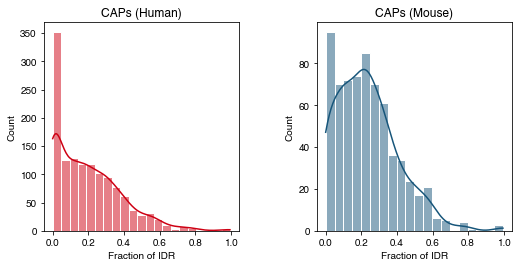

In [25]:
fig, axs = plt.subplots(figsize = (10, 5), nrows = 1, ncols = 2)
sns.histplot(data = df_human_mobidb, x = "fraction", kde = True, color = "#CE0013", edgecolor = "white", ax = axs[0])
sns.histplot(data = df_mouse_mobidb, x = "fraction", kde = True, color = "#16557A", edgecolor = "white", ax = axs[1])
axs[0].set_xlabel("Fraction of IDR")
axs[1].set_xlabel("Fraction of IDR")
axs[0].set_title("CAPs (Human)")
axs[1].set_title("CAPs (Mouse)")

plt.subplots_adjust(left = 0.25, bottom = 0.3, wspace = 0.4)
fig.savefig("CAP_IDR_fraction_distribution.pdf")

### IDR percentage of known LLPS protein

In [36]:
df_LLPS_human = pd.read_csv("../../LLPS/LLPS_human_merged.txt", header = 0, sep = "\t")
CAP_LLPS_human = np.unique(df_LLPS_human.loc[:, "UniProt ID"].values)
df_CAP_LLPS_human_mobidb_fraction = df_human_mobidb.loc[df_human_mobidb["UID"].isin(CAP_LLPS_human), :]

In [37]:
df_CAP_LLPS_human_mobidb_fraction

,UID,fraction
7,Q9UKV8,0.030268
39,Q6VMQ6,0.504724
41,P46100,0.486758
55,Q9H165,0.335329
66,P15056,0.238903
...,...,...
958,Q9H0D6,0.146316
959,P46937,0.380952
962,P25490,0.227053
1056,O43670,0.527197


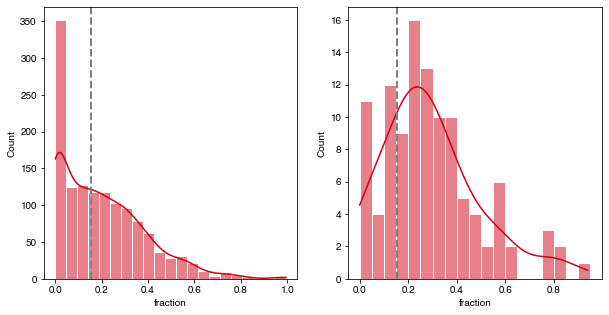

In [62]:
fig, axs = plt.subplots(figsize = (10, 5), nrows = 1, ncols = 2)
sns.histplot(data = df_human_mobidb, x = "fraction", kde = True, color = "#CE0013", edgecolor = "white", ax = axs[0])
sns.histplot(data = df_CAP_LLPS_human_mobidb_fraction, x = "fraction", kde = True, color = "#CE0013", 
             binwidth = 0.05, edgecolor = "white", ax = axs[1])

axs[0].axvline(x = 0.153, color = "grey", linewidth = 2, linestyle = "--")
axs[1].axvline(x = 0.153, color = "grey", linewidth = 2, linestyle = "--")

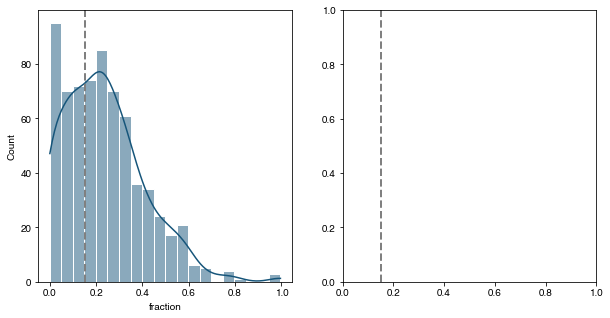

In [64]:
fig, axs = plt.subplots(figsize = (10, 5), nrows = 1, ncols = 2)
sns.histplot(data = df_mouse_mobidb, x = "fraction", kde = True, color = "#16557A", edgecolor = "white", ax = axs[0])

axs[0].axvline(x = 0.153, color = "grey", linewidth = 2, linestyle = "--")
axs[1].axvline(x = 0.153, color = "grey", linewidth = 2, linestyle = "--")

In [61]:
np.quantile(df_CAP_LLPS_human_mobidb_fraction.loc[:,"fraction"], q = np.linspace(0,1,5))

array([0.        , 0.15300979, 0.25773035, 0.38527134, 0.93884409])